DESCRIPTIVE ANALYSIS ON DATA



In [ ]:
import pandas as pd
import numpy as np

In [ ]:
FILE_PATH = "DATA.csv"
df = pd.read_csv(FILE_PATH)

DATE_COL = "Date"

df[DATE_COL] = pd.to_datetime(df[DATE_COL], dayfirst=True)
df = df.sort_values(DATE_COL)
df.set_index(DATE_COL, inplace=True)

print(df.head())
print(df.columns)
print(df.index.min(), df.index.max())

              3M    6M    1Y    2Y    3Y    4Y     5Y     6Y    10Y    15Y  \
Date                                                                         
2014-01-01  7.52  7.83  8.27  8.86  9.05  9.54  10.29  10.37  10.89  11.54   
2014-01-02  7.28  7.48  7.80  8.23  8.83  9.10   9.68  10.04  10.86  11.60   
2014-01-03  7.32  7.54  7.91  8.44  8.66  8.86   9.91  10.05  10.36  11.07   
2014-01-06  7.23  7.47  7.88  8.39  8.63  8.96   9.63   9.99  10.38  11.08   
2014-01-07  7.14  7.33  7.67  8.46  8.51  9.16   9.72   9.95  10.18  11.11   

              20Y  
Date               
2014-01-01  11.61  
2014-01-02  11.56  
2014-01-03  11.29  
2014-01-06  11.22  
2014-01-07  11.50  
Index(['3M', '6M', '1Y', '2Y', '3Y', '4Y', '5Y', '6Y', '10Y', '15Y', '20Y'], dtype='object')
2014-01-01 00:00:00 2025-10-30 00:00:00


In [ ]:
yield_df = df.copy()

In [ ]:
def describe_yield(series):
    stats = {}

    # Basic descriptive stats
    stats['N']     = series.count()
    stats['Mean']  = series.mean()
    stats['SD']    = series.std()          # sample standard deviation
    stats['Min']   = series.min()
    stats['Max']   = series.max()

    # Sample autocorrelations at lags 30, 365, 900 days
    for lag in [30, 365, 900]:
        if lag < series.count():
            stats[f'r({lag})'] = series.autocorr(lag=lag)
        else:

            stats[f'r({lag})'] = np.nan

    return pd.Series(stats)

In [ ]:
summary_table = yield_df.apply(describe_yield).T

In [ ]:
summary_table = summary_table.round(4)

In [ ]:
print(summary_table)

          N     Mean      SD   Min    Max   r(30)  r(365)  r(900)
3M   2835.0   9.9739  6.2349  4.50  31.37  0.9669 -0.1416  0.3052
6M   2835.0  10.1067  5.9141  4.61  30.17  0.9628 -0.1632  0.2087
1Y   2835.0  10.2512  5.6090  4.80  28.78  0.9560 -0.1980  0.2141
2Y   2835.0  10.6859  5.3769  5.16  28.43  0.9549 -0.1775  0.1347
3Y   2835.0  11.2632  5.3103  5.59  28.55  0.9552 -0.1684  0.1055
4Y   2835.0  11.4778  5.0669  6.02  28.33  0.9539 -0.1515  0.0890
5Y   2835.0  11.6372  4.8726  6.30  27.60  0.9533 -0.1469  0.0664
6Y   2835.0  11.7775  4.7319  6.37  28.02  0.9527 -0.1430  0.0508
10Y  2835.0  12.1174  4.5550  6.84  28.51  0.9495 -0.1288  0.0311
15Y  2835.0  12.2024  4.2379  7.13  27.80  0.9416 -0.1438  0.0031
20Y  2835.0  12.0663  3.5632  7.15  25.34  0.9402 -0.1671 -0.0589


In [ ]:
summary_table.to_excel("yield_descriptive_stats.xlsx")


AVERAGE YIELD CURVE

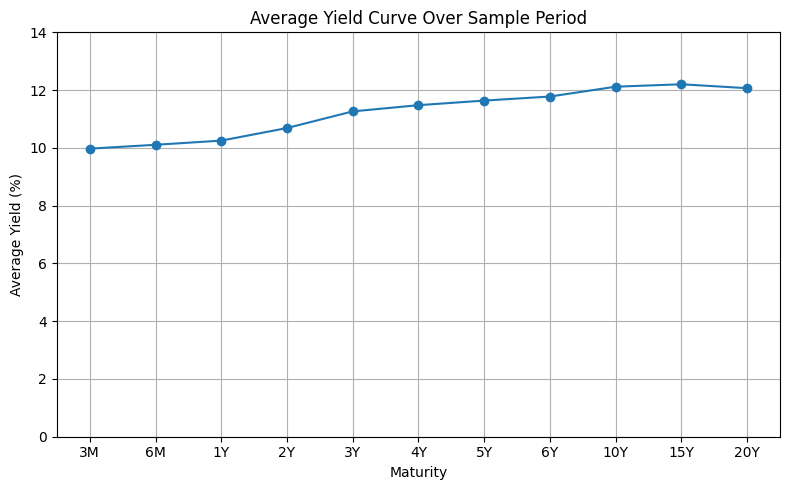

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("DATA.csv")


df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)
df = df.set_index("Date").sort_index()

mean_curve = df.mean()

# Plot average yield curve
plt.figure(figsize=(8, 5))
plt.plot(mean_curve.index.astype(str), mean_curve.values, marker="o")

plt.ylim(0, 14)   # <<< Set y-axis from 0 to 14

plt.xlabel("Maturity")
plt.ylabel("Average Yield (%)")
plt.title("Average Yield Curve Over Sample Period")
plt.grid(True)
plt.tight_layout()

plt.show()


AVERAGE YIELD CURVE ACROSS CRISIS PHASES (SRI LANKA)

Number of observations in each period:
Pre-crisis 2019: 243 days
Build-up 2020–2021: 478 days
Default year 2022: 240 days
Stabilisation 2023: 242 days
Recovery 2024: 241 days
Post-default 2025 YTD: 192 days


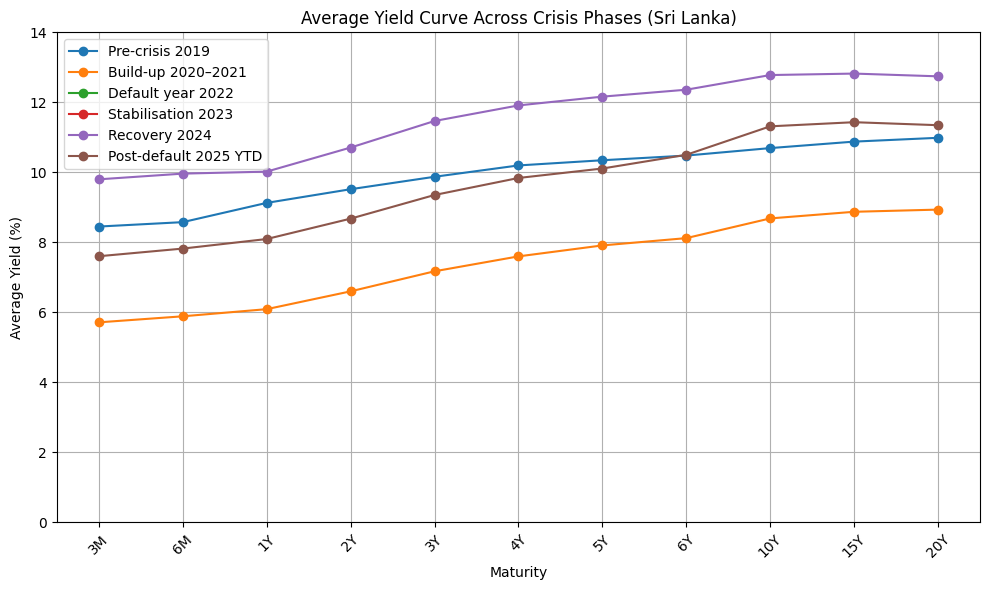

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("DATA.csv")

df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)
df = df.set_index("Date").sort_index()

last_date = df.index.max().strftime("%Y-%m-%d")

periods = {
    "Pre-crisis 2019":           ("2019-01-01", "2019-12-31"),
    "Build-up 2020–2021":        ("2020-01-01", "2021-12-31"),
    "Default year 2022":         ("2022-01-01", "2022-12-31"),
    "Stabilisation 2023":        ("2023-01-01", "2023-12-31"),
    "Recovery 2024":             ("2024-01-01", "2024-12-31"),
    "Post-default 2025 YTD":     ("2025-01-01", last_date),
}

mean_curves = {}
obs_counts = {}

for label, (start, end) in periods.items():
    mask = (df.index >= start) & (df.index <= end)
    sub = df.loc[mask]


    if sub.empty:
        print(f"Warning: no data for period '{label}' ({start} to {end})")
        continue

    mean_curves[label] = sub.mean()
    obs_counts[label] = len(sub)

print("Number of observations in each period:")
for label, n in obs_counts.items():
    print(f"{label}: {n} days")


plt.figure(figsize=(10, 6))

for label, curve in mean_curves.items():
    plt.plot(curve.index.astype(str), curve.values, marker="o", label=label)

plt.xlabel("Maturity")
plt.ylabel("Average Yield (%)")
plt.title("Average Yield Curve Across Crisis Phases (Sri Lanka)")
plt.ylim(0, 14)
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
